In [1]:
# Importing all the necessary modules to process our excel file
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import ExcelFile
from pandas import ExcelWriter
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")
# %pwd

In [3]:
# First task is to import the raw Excel file for processing purpose
filename = r"Medical Data v4.xlsx"

initial_df = pd.read_excel(filename,sheet_name=0,index_col=0,skiprows=0,nrows=373)


In [4]:

initial_df

,AGE (YRS),GES. AT BOOKING (WEEK),GES. AT DELIVERY (WEEK),BOOKING WEIGHT (KG),NO OF ANC ATTENDED,IPTS RECEIVED,PVC,PARITY,TYPE OF HEMATINIC RECEIVED,MARITAL STATUS,TYPE OF LABOUR,MODE OF DELIVERY,FETAL WEIGHT (KG),FETAL SEX,APGAR SCORES AT 1 MINUTE,APGAR SCORES AT 5 MINUTES,LENGTH OF HOSPITAL,FETAL OUTCOME,MATERNAL OUTCOME,NEED FOR SPECIAL BABY CARE
S/N,,,,,,,,,,,,,,,,,,,,
1,32,7,38,57.0,6,1,32,G2PI,Oral,Married,Term,Assisted Breech Delivery,2.5,Male,9^1,10^5,4,Alive,Alive,No
2,26,10,38,51.0,6,2,32,Primp,Oral,Married,Term,Forceps Delivery,3.0,Female,9^5,10,4,Alive,Alive,No
3,24,11,38,51.0,6,2,32,Primp,Oral,Married,Term,Forceps Delivery,3.0,Male,9^1,10^5,4,Alive,Alive,No
4,29,10,38,51.0,6,2,32,Primp,Oral,Married,Term,Forceps Delivery,3.0,Male,9^1,10^5,4,Alive,Alive,No
5,23,11,38,61.0,9,3,0,G3PO+2,Oral,Married,Term,Forceps Delivery,2.9,Male,7^1,9^5,4,Alive,Alive,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,26,22,34,65.0,5,1,0,G3P2,Oral,Married,Term,SVD,2.2,Female,5^1,9^5,5,Alive,Alive,No
369,26,15,38,65.0,8,3,35,G3P2,Oral,Married,Preterm,Vacuum Delivery,2.5,Male,5^1,9^5,7,Alive,Alive,Yes
370,32,24,36,64.0,6,2,36,G3P2,Oral,Married,Augmentation,SVD,3.0,Female,5^1,9^5,6,Alive,Alive,Yes


In [5]:
# Identifiying columns with Nan Values
for cols in initial_df.columns:
    print(f'\t{cols:<28}: {initial_df[cols].isna().sum()} NaN Values')

	AGE (YRS)                   : 0 NaN Values
	GES. AT BOOKING (WEEK)      : 0 NaN Values
	GES. AT DELIVERY (WEEK)     : 0 NaN Values
	BOOKING WEIGHT (KG)         : 0 NaN Values
	NO OF ANC ATTENDED          : 0 NaN Values
	IPTS RECEIVED               : 0 NaN Values
	PVC                         : 0 NaN Values
	PARITY                      : 1 NaN Values
	TYPE OF HEMATINIC RECEIVED  : 0 NaN Values
	MARITAL STATUS              : 3 NaN Values
	TYPE OF LABOUR              : 0 NaN Values
	MODE OF DELIVERY            : 0 NaN Values
	FETAL WEIGHT (KG)           : 0 NaN Values
	FETAL SEX                   : 0 NaN Values
	APGAR SCORES AT 1 MINUTE    : 0 NaN Values
	APGAR SCORES AT 5 MINUTES   : 0 NaN Values
	LENGTH OF HOSPITAL          : 0 NaN Values
	FETAL OUTCOME               : 0 NaN Values
	MATERNAL OUTCOME            : 0 NaN Values
	NEED FOR  SPECIAL BABY CARE : 0 NaN Values


In [6]:
# df = pd.DataFrame({'Actual': y_test.flatten(), 'yearly_lrm': y_year_lrm.flatten()})
initial_df.columns

Index(['AGE (YRS)', 'GES. AT BOOKING (WEEK)', 'GES. AT DELIVERY (WEEK)',
       'BOOKING WEIGHT (KG)', 'NO OF ANC ATTENDED', 'IPTS RECEIVED', 'PVC',
       'PARITY', 'TYPE OF HEMATINIC RECEIVED', 'MARITAL STATUS',
       'TYPE OF LABOUR', 'MODE OF DELIVERY', 'FETAL WEIGHT (KG)', 'FETAL SEX',
       'APGAR SCORES AT 1 MINUTE', 'APGAR SCORES AT 5 MINUTES',
       'LENGTH OF HOSPITAL', 'FETAL OUTCOME', 'MATERNAL OUTCOME',
       'NEED FOR  SPECIAL BABY CARE'],
      dtype='object')

In [7]:
# Grouping by Expected outcome to check skewness

In [8]:
initial_df.groupby(['FETAL OUTCOME'])['FETAL OUTCOME'].count().sort_values()

FETAL OUTCOME
Dead      20
Alive    352
Name: FETAL OUTCOME, dtype: int64

In [9]:
initial_df.groupby('MATERNAL OUTCOME')['MATERNAL OUTCOME'].count().sort_values()

MATERNAL OUTCOME
Dead      20
Alive    352
Name: MATERNAL OUTCOME, dtype: int64

In [10]:
initial_df.groupby('NEED FOR  SPECIAL BABY CARE')['NEED FOR  SPECIAL BABY CARE'].count().sort_values()

NEED FOR  SPECIAL BABY CARE
Dead      5
Yes      49
No      318
Name: NEED FOR  SPECIAL BABY CARE, dtype: int64

In [11]:
# The data is imbalance and is VERY likely to be bias

In [12]:
needed_data = initial_df.copy()

In [13]:
initial_df.columns

Index(['AGE (YRS)', 'GES. AT BOOKING (WEEK)', 'GES. AT DELIVERY (WEEK)',
       'BOOKING WEIGHT (KG)', 'NO OF ANC ATTENDED', 'IPTS RECEIVED', 'PVC',
       'PARITY', 'TYPE OF HEMATINIC RECEIVED', 'MARITAL STATUS',
       'TYPE OF LABOUR', 'MODE OF DELIVERY', 'FETAL WEIGHT (KG)', 'FETAL SEX',
       'APGAR SCORES AT 1 MINUTE', 'APGAR SCORES AT 5 MINUTES',
       'LENGTH OF HOSPITAL', 'FETAL OUTCOME', 'MATERNAL OUTCOME',
       'NEED FOR  SPECIAL BABY CARE'],
      dtype='object')

In [14]:
needed_data.dtypes

AGE (YRS)                        int64
GES. AT BOOKING (WEEK)           int64
GES. AT DELIVERY (WEEK)          int64
BOOKING WEIGHT (KG)            float64
NO OF ANC ATTENDED               int64
IPTS RECEIVED                    int64
PVC                              int64
PARITY                          object
TYPE OF HEMATINIC RECEIVED      object
MARITAL STATUS                  object
TYPE OF LABOUR                  object
MODE OF DELIVERY                object
FETAL WEIGHT (KG)              float64
FETAL SEX                       object
APGAR SCORES AT 1 MINUTE        object
APGAR SCORES AT 5 MINUTES       object
LENGTH OF HOSPITAL               int64
FETAL OUTCOME                   object
MATERNAL OUTCOME                object
NEED FOR  SPECIAL BABY CARE     object
dtype: object

In [15]:
objList = needed_data.select_dtypes(include = "object").columns
print (objList)

Index(['PARITY', 'TYPE OF HEMATINIC RECEIVED', 'MARITAL STATUS',
       'TYPE OF LABOUR', 'MODE OF DELIVERY', 'FETAL SEX',
       'APGAR SCORES AT 1 MINUTE', 'APGAR SCORES AT 5 MINUTES',
       'FETAL OUTCOME', 'MATERNAL OUTCOME', 'NEED FOR  SPECIAL BABY CARE'],
      dtype='object')


In [16]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC

In [17]:
# Converting Categorical Data into Numerical data

le = LabelEncoder()
for feat in objList:
    needed_data[feat] = le.fit_transform(needed_data[feat].astype(str))

In [18]:
needed_data

,AGE (YRS),GES. AT BOOKING (WEEK),GES. AT DELIVERY (WEEK),BOOKING WEIGHT (KG),NO OF ANC ATTENDED,IPTS RECEIVED,PVC,PARITY,TYPE OF HEMATINIC RECEIVED,MARITAL STATUS,TYPE OF LABOUR,MODE OF DELIVERY,FETAL WEIGHT (KG),FETAL SEX,APGAR SCORES AT 1 MINUTE,APGAR SCORES AT 5 MINUTES,LENGTH OF HOSPITAL,FETAL OUTCOME,MATERNAL OUTCOME,NEED FOR SPECIAL BABY CARE
S/N,,,,,,,,,,,,,,,,,,,,
1,32,7,38,57.0,6,1,32,9,1,0,4,1,2.5,2,9,5,4,0,0,1
2,26,10,38,51.0,6,2,32,35,1,0,4,4,3.0,0,10,2,4,0,0,1
3,24,11,38,51.0,6,2,32,35,1,0,4,4,3.0,2,9,5,4,0,0,1
4,29,10,38,51.0,6,2,32,35,1,0,4,4,3.0,2,9,5,4,0,0,1
5,23,11,38,61.0,9,3,0,20,1,0,4,4,2.9,2,6,20,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,26,22,34,65.0,5,1,0,17,1,0,4,5,2.2,0,3,20,5,0,0,1
369,26,15,38,65.0,8,3,35,17,1,0,3,6,2.5,2,3,20,7,0,0,2
370,32,24,36,64.0,6,2,36,17,1,0,0,5,3.0,0,3,20,6,0,0,2


In [19]:
# Exporting Results
needed_data.to_excel("Studentcopy Medical Data v4.xlsx")
print("The data output has been exported successfully")

The data output has been exported successfully


In [20]:
# Getting an idea of the structure of the dataframe
needed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 1 to 372
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AGE (YRS)                    372 non-null    int64  
 1   GES. AT BOOKING (WEEK)       372 non-null    int64  
 2   GES. AT DELIVERY (WEEK)      372 non-null    int64  
 3   BOOKING WEIGHT (KG)          372 non-null    float64
 4   NO OF ANC ATTENDED           372 non-null    int64  
 5   IPTS RECEIVED                372 non-null    int64  
 6   PVC                          372 non-null    int64  
 7   PARITY                       372 non-null    int32  
 8   TYPE OF HEMATINIC RECEIVED   372 non-null    int32  
 9   MARITAL STATUS               372 non-null    int32  
 10  TYPE OF LABOUR               372 non-null    int32  
 11  MODE OF DELIVERY             372 non-null    int32  
 12  FETAL WEIGHT (KG)            372 non-null    float64
 13  FETAL SEX           

In [21]:
# Converting the data to minimize size

In [22]:
int64_List = needed_data.select_dtypes(include = "int64").columns
print (int64_List)

Index(['AGE (YRS)', 'GES. AT BOOKING (WEEK)', 'GES. AT DELIVERY (WEEK)',
       'NO OF ANC ATTENDED', 'IPTS RECEIVED', 'PVC', 'LENGTH OF HOSPITAL'],
      dtype='object')


In [23]:
# The int64 is too big, reduce it to int16, there are int16, int32, int64

for column in int64_List:
    needed_data[column] = needed_data[column].astype ("int16")
    
needed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 1 to 372
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AGE (YRS)                    372 non-null    int16  
 1   GES. AT BOOKING (WEEK)       372 non-null    int16  
 2   GES. AT DELIVERY (WEEK)      372 non-null    int16  
 3   BOOKING WEIGHT (KG)          372 non-null    float64
 4   NO OF ANC ATTENDED           372 non-null    int16  
 5   IPTS RECEIVED                372 non-null    int16  
 6   PVC                          372 non-null    int16  
 7   PARITY                       372 non-null    int32  
 8   TYPE OF HEMATINIC RECEIVED   372 non-null    int32  
 9   MARITAL STATUS               372 non-null    int32  
 10  TYPE OF LABOUR               372 non-null    int32  
 11  MODE OF DELIVERY             372 non-null    int32  
 12  FETAL WEIGHT (KG)            372 non-null    float64
 13  FETAL SEX           

In [24]:
int32_List = needed_data.select_dtypes(include = "int32").columns
print (int32_List)

Index(['PARITY', 'TYPE OF HEMATINIC RECEIVED', 'MARITAL STATUS',
       'TYPE OF LABOUR', 'MODE OF DELIVERY', 'FETAL SEX',
       'APGAR SCORES AT 1 MINUTE', 'APGAR SCORES AT 5 MINUTES',
       'FETAL OUTCOME', 'MATERNAL OUTCOME', 'NEED FOR  SPECIAL BABY CARE'],
      dtype='object')


In [25]:
# The int32 is too big, reduce it to int16, there are int16, int32, int64

for column in int32_List:
    needed_data[column] = needed_data[column].astype ("int16")
    
needed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 1 to 372
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AGE (YRS)                    372 non-null    int16  
 1   GES. AT BOOKING (WEEK)       372 non-null    int16  
 2   GES. AT DELIVERY (WEEK)      372 non-null    int16  
 3   BOOKING WEIGHT (KG)          372 non-null    float64
 4   NO OF ANC ATTENDED           372 non-null    int16  
 5   IPTS RECEIVED                372 non-null    int16  
 6   PVC                          372 non-null    int16  
 7   PARITY                       372 non-null    int16  
 8   TYPE OF HEMATINIC RECEIVED   372 non-null    int16  
 9   MARITAL STATUS               372 non-null    int16  
 10  TYPE OF LABOUR               372 non-null    int16  
 11  MODE OF DELIVERY             372 non-null    int16  
 12  FETAL WEIGHT (KG)            372 non-null    float64
 13  FETAL SEX           

In [26]:
float64_List = needed_data.select_dtypes(include = "float64").columns
print (float64_List)

Index(['BOOKING WEIGHT (KG)', 'FETAL WEIGHT (KG)'], dtype='object')


In [27]:
# The int64 is too big, reduce it to int16, there are int16, int32, int64
# Changing all the columns with the object data type to string
for column in float64_List:
    needed_data[column] = needed_data[column].astype ("float16")
    
needed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 1 to 372
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AGE (YRS)                    372 non-null    int16  
 1   GES. AT BOOKING (WEEK)       372 non-null    int16  
 2   GES. AT DELIVERY (WEEK)      372 non-null    int16  
 3   BOOKING WEIGHT (KG)          372 non-null    float16
 4   NO OF ANC ATTENDED           372 non-null    int16  
 5   IPTS RECEIVED                372 non-null    int16  
 6   PVC                          372 non-null    int16  
 7   PARITY                       372 non-null    int16  
 8   TYPE OF HEMATINIC RECEIVED   372 non-null    int16  
 9   MARITAL STATUS               372 non-null    int16  
 10  TYPE OF LABOUR               372 non-null    int16  
 11  MODE OF DELIVERY             372 non-null    int16  
 12  FETAL WEIGHT (KG)            372 non-null    float16
 13  FETAL SEX           

In [28]:
# Data Normalization to remove outliers in the dataset
#needed_data[['AGE (YRS)', 'BOOKING WEIGHT (KG)']] = np.log10(needed_data[['AGE (YRS)', 'BOOKING WEIGHT (KG)']])
#needed_data[['AGE (YRS)', 'BOOKING WEIGHT (KG)']]

In [29]:
# To find the correlation among
# the columns using pearson method
needed_data.corr(method ='pearson')

,AGE (YRS),GES. AT BOOKING (WEEK),GES. AT DELIVERY (WEEK),BOOKING WEIGHT (KG),NO OF ANC ATTENDED,IPTS RECEIVED,PVC,PARITY,TYPE OF HEMATINIC RECEIVED,MARITAL STATUS,TYPE OF LABOUR,MODE OF DELIVERY,FETAL WEIGHT (KG),FETAL SEX,APGAR SCORES AT 1 MINUTE,APGAR SCORES AT 5 MINUTES,LENGTH OF HOSPITAL,FETAL OUTCOME,MATERNAL OUTCOME,NEED FOR SPECIAL BABY CARE
AGE (YRS),1.000000,0.219961,0.103559,0.330773,-0.040258,-0.071549,0.117356,-0.255993,-7.648981e-02,-0.093326,-0.059813,-0.053760,0.218022,0.118582,0.212776,-2.210380e-01,-0.101946,-2.235364e-02,-1.195382e-04,-0.144515
GES. AT BOOKING (WEEK),0.219961,1.000000,0.092980,0.088284,-0.716686,-0.403444,-0.247967,-0.173041,-1.750258e-01,0.040248,-0.082651,-0.184933,-0.111960,-0.262357,-0.010065,-4.577307e-02,0.041719,9.722713e-02,1.185745e-01,-0.059559
GES. AT DELIVERY (WEEK),0.103559,0.092980,1.000000,0.013946,0.281323,0.030633,0.015456,-0.195576,6.092895e-02,-0.001196,0.060133,-0.008656,0.416560,0.338885,0.151446,-5.119513e-02,-0.316445,-4.923928e-02,-3.108565e-02,-0.334270
BOOKING WEIGHT (KG),0.330773,0.088284,0.013946,1.000000,-0.117062,-0.100156,-0.086286,-0.139223,-2.652813e-01,-0.137045,0.044601,0.035762,0.213367,-0.071099,0.269390,1.694043e-03,-0.110853,-1.011221e-01,-1.252990e-01,-0.111096
NO OF ANC ATTENDED,-0.040258,-0.716686,0.281323,-0.117062,1.000000,0.534061,0.337458,0.027561,1.971889e-01,0.037378,-0.010852,0.249762,0.289244,0.473554,0.007829,3.359890e-02,-0.181457,-2.987826e-02,-2.987826e-02,-0.116512
IPTS RECEIVED,-0.071549,-0.403444,0.030633,-0.100156,0.534061,1.000000,0.272909,0.052111,-1.926097e-02,0.022387,0.015903,0.228764,0.130435,0.254807,-0.039957,1.500807e-01,-0.153913,5.121688e-02,3.208768e-02,-0.038237
PVC,0.117356,-0.247967,0.015456,-0.086286,0.337458,0.272909,1.000000,-0.054655,5.818245e-02,-0.001865,-0.058236,0.042597,0.195671,0.248237,-0.050740,-1.454135e-01,0.034765,-4.395519e-02,-3.900225e-02,0.050204
PARITY,-0.255993,-0.173041,-0.195576,-0.139223,0.027561,0.052111,-0.054655,1.000000,6.195153e-02,0.098481,0.118671,0.209270,-0.191835,-0.033765,-0.082928,1.102070e-01,0.059907,-9.478958e-02,-1.351008e-01,0.125139
TYPE OF HEMATINIC RECEIVED,-0.076490,-0.175026,0.060929,-0.265281,0.197189,-0.019261,0.058182,0.061952,1.000000e+00,0.033425,-0.025393,-0.089782,-0.019560,0.160028,-0.077110,-2.433090e-17,0.022192,5.558347e-16,5.493428e-16,-0.022089
MARITAL STATUS,-0.093326,0.040248,-0.001196,-0.137045,0.037378,0.022387,-0.001865,0.098481,3.342451e-02,1.000000,0.050979,0.010842,-0.040048,0.031403,-0.103815,8.011807e-02,0.002959,6.960416e-03,6.960416e-03,0.065354


In [30]:
# To find the correlation among
# the columns using pearson method
needed_data.corr(method ='kendall')

,AGE (YRS),GES. AT BOOKING (WEEK),GES. AT DELIVERY (WEEK),BOOKING WEIGHT (KG),NO OF ANC ATTENDED,IPTS RECEIVED,PVC,PARITY,TYPE OF HEMATINIC RECEIVED,MARITAL STATUS,TYPE OF LABOUR,MODE OF DELIVERY,FETAL WEIGHT (KG),FETAL SEX,APGAR SCORES AT 1 MINUTE,APGAR SCORES AT 5 MINUTES,LENGTH OF HOSPITAL,FETAL OUTCOME,MATERNAL OUTCOME,NEED FOR SPECIAL BABY CARE
AGE (YRS),1.000000,0.181329,0.052119,0.225211,-0.046389,-0.075365,0.163941,-0.165300,-0.065445,-0.131388,0.007242,-0.018197,0.149711,0.100151,0.147349,-0.162052,-0.034428,-0.021730,0.001518,-0.117247
GES. AT BOOKING (WEEK),0.181329,1.000000,-0.005797,0.055762,-0.581537,-0.343652,-0.139521,-0.120506,-0.121011,0.021885,-0.019960,-0.125733,-0.111048,-0.211648,-0.041519,-0.026019,0.076791,0.098177,0.122663,-0.029330
GES. AT DELIVERY (WEEK),0.052119,-0.005797,1.000000,0.035127,0.259478,0.030449,0.043734,-0.144628,0.083800,-0.012669,0.081618,0.031148,0.285768,0.283770,0.044356,-0.105773,-0.115097,0.005353,0.032370,-0.203239
BOOKING WEIGHT (KG),0.225211,0.055762,0.035127,1.000000,-0.073558,-0.056391,0.027955,-0.087721,-0.208376,-0.141323,-0.012268,0.021327,0.145840,-0.064908,0.191893,-0.015045,-0.045518,-0.071570,-0.095505,-0.088814
NO OF ANC ATTENDED,-0.046389,-0.581537,0.259478,-0.073558,1.000000,0.500738,0.233389,0.019086,0.138692,0.013428,0.041433,0.205957,0.228798,0.422330,0.029788,0.038052,-0.215371,-0.036171,-0.036171,-0.112255
IPTS RECEIVED,-0.075365,-0.343652,0.030449,-0.056391,0.500738,1.000000,0.236370,0.044727,-0.007582,0.017154,-0.021285,0.193586,0.100034,0.251818,-0.024934,0.130797,-0.162547,0.057702,0.045913,-0.040695
PVC,0.163941,-0.139521,0.043734,0.027955,0.233389,0.236370,1.000000,-0.063308,0.037359,-0.020091,-0.092755,0.058602,0.170136,0.223402,0.034864,-0.193386,-0.049632,-0.090629,-0.065840,0.046366
PARITY,-0.165300,-0.120506,-0.144628,-0.087721,0.019086,0.044727,-0.063308,1.000000,0.052622,0.131437,0.049640,0.136492,-0.142902,-0.030630,-0.040164,0.075641,-0.021017,-0.078378,-0.117934,0.095490
TYPE OF HEMATINIC RECEIVED,-0.065445,-0.121011,0.083800,-0.208376,0.138692,-0.007582,0.037359,0.052622,1.000000,0.042461,-0.022849,-0.087556,-0.005941,0.157345,-0.067625,-0.002900,0.056454,0.000000,0.000000,-0.021923
MARITAL STATUS,-0.131388,0.021885,-0.012669,-0.141323,0.013428,0.017154,-0.020091,0.131437,0.042461,1.000000,0.037117,0.002908,-0.079766,0.029567,-0.115160,0.097065,0.057083,0.018955,0.018955,0.097736


In [31]:
# The Independent variables

X_val = needed_data.drop(columns=['FETAL OUTCOME', 'MATERNAL OUTCOME', 'NEED FOR  SPECIAL BABY CARE'])


In [32]:
type(X_val)

pandas.core.frame.DataFrame

In [33]:
#The Dependent Variables Examples meaning yes

y_val = needed_data['FETAL OUTCOME']
y_val

S/N
1      0
2      0
3      0
4      0
5      0
      ..
368    0
369    0
370    0
371    0
372    0
Name: FETAL OUTCOME, Length: 372, dtype: int16

In [34]:
# Checking the bias of the output or target column
needed_data.groupby(['FETAL OUTCOME'])['FETAL OUTCOME'].count().sort_values()

FETAL OUTCOME
1     20
0    352
Name: FETAL OUTCOME, dtype: int64

In [35]:
y_val.value_counts()

0    352
1     20
Name: FETAL OUTCOME, dtype: int64

In [36]:
## Install the imbalanced-Learn module
!pip install imbalanced-learn

In [37]:
# Make the target variable balanced (Up Sampling) v1
# Up Sampling is best suited for small datasets.
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_val, y_val)

In [38]:
# Confirming that the target values are balanced (up Sampling)
y_smote.value_counts()

0    352
1    352
Name: FETAL OUTCOME, dtype: int64

In [39]:
# Make the target variable balanced (Down Sampling) v2
# Down Sampling is only fitted for large Datasets e.g Fraud datasets
from imblearn.under_sampling import NearMiss
n_miss = NearMiss()
X_nm, y_nm = n_miss.fit_resample(X_val, y_val)

In [40]:
# Confirming that the target values are balanced (Down Sampling)
# It works but will not be used.
y_nm.value_counts()

0    20
1    20
Name: FETAL OUTCOME, dtype: int64

In [41]:
from time import time
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [42]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [77]:
train_X, test_X, train_y, test_y = train_test_split(X_smote, y_smote, test_size=0.20,random_state=0)

In [78]:
# Creating a list of classifiers
reg1 = GradientBoostingClassifier(random_state=1)
reg2 = RandomForestClassifier(random_state=1)
classifiers = [
    GaussianNB(),
    #MultinomialNB(),
    #ComplementNB(),
    BernoulliNB(),
    LogisticRegression(),
    Lasso(),
    RidgeClassifier(),
    SGDClassifier(),
    SVC(),
    LinearSVC(),
    KNeighborsClassifier(),
    MLPClassifier(hidden_layer_sizes=(5,), random_state=1, max_iter=500, warm_start=True),
    BaggingClassifier(estimator=ExtraTreesClassifier(),n_estimators=64, random_state=0),
    RandomForestClassifier(n_estimators=64, max_depth=10, min_samples_split=2, random_state=0),
    AdaBoostClassifier(n_estimators=5),
    ExtraTreesClassifier(n_estimators=64, max_depth=6, min_samples_split=2, random_state=0),
    GradientBoostingClassifier(n_estimators=64, max_depth=10, min_samples_split=2, random_state=0),
    HistGradientBoostingClassifier(),
    NearestCentroid(),
    VotingClassifier([("gb", reg1), ("rf", reg2)])
    #StackingClassifier(estimators=20)
]

In [82]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import MaxAbsScaler, Normalizer, PowerTransformer, QuantileTransformer  
from sklearn.compose import TransformedTargetRegressor
scalers = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
    MaxAbsScaler()
]

In [83]:
# Create a dataframe to store the model training performance
perf_index = 0
performance_df = pd.DataFrame(columns= ['train_time','pred_time','train_score','test_score',"ml_model"])

In [87]:
head = len(classifiers)

for scaler in scalers:
    # for classification, you only need to scale the input features
    Xtrain_scale = scaler.fit_transform(train_X)
    Xtest_scale = scaler.transform(test_X) 
    
    for model in classifiers[:head]:
        start = time()
        model.fit(Xtrain_scale, train_y)
        train_score = np.round(model.score(Xtrain_scale, train_y)*100,2)
        train_time = time() - start

        start = time()
        y_pred = model.predict(Xtest_scale)
        test_score = np.round(r2_score(test_y, y_pred),4)*100
        predict_time = time()-start

        print(model)

        performance_df.loc[perf_index] = [train_time,predict_time,train_score,test_score,(str(scaler)+": "+str(model))]
        print(f'Training score: {train_score},  Test Score: {test_score}')
        perf_index +=1
        print()
    print('Simulation Completed')

GaussianNB()
Training score: 95.91,  Test Score: 71.52

BernoulliNB()
Training score: 93.07,  Test Score: 37.330000000000005

LogisticRegression()
Training score: 99.64,  Test Score: 97.15

Lasso()
Training score: 0.0,  Test Score: -0.64

RidgeClassifier()
Training score: 98.76,  Test Score: 91.45

SGDClassifier()
Training score: 98.58,  Test Score: 94.3

SVC()
Training score: 100.0,  Test Score: 97.15

LinearSVC()
Training score: 100.0,  Test Score: 100.0

KNeighborsClassifier()
Training score: 98.76,  Test Score: 80.06

MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=1,
              warm_start=True)
Training score: 99.47,  Test Score: 94.3

BaggingClassifier(estimator=ExtraTreesClassifier(), n_estimators=64,
                  random_state=0)
Training score: 100.0,  Test Score: 100.0

RandomForestClassifier(max_depth=10, n_estimators=64, random_state=0)
Training score: 100.0,  Test Score: 100.0

AdaBoostClassifier(n_estimators=5)
Training score: 100.0,  Test Score: 

In [88]:
# Sorting the model performance by train score and test score
performance_df.sort_values(by=['train_score','test_score'], ascending=False).head(40)

,train_time,pred_time,train_score,test_score,ml_model
7,0.020002,0.001000,100.00,100.00,StandardScaler() LinearSVC()
10,16.955098,1.207006,100.00,100.00,StandardScaler() BaggingClassifier(estimator=E...
11,0.202000,0.018001,100.00,100.00,StandardScaler() RandomForestClassifier(max_de...
12,0.027000,0.003999,100.00,100.00,StandardScaler() AdaBoostClassifier(n_estimato...
13,0.138000,0.011001,100.00,100.00,StandardScaler() ExtraTreesClassifier(max_dept...
15,0.927178,0.007002,100.00,100.00,StandardScaler() HistGradientBoostingClassifier()
17,0.577570,0.023527,100.00,100.00,StandardScaler() VotingClassifier(estimators=[...
28,19.358943,1.603110,100.00,100.00,MinMaxScaler() BaggingClassifier(estimator=Ext...
29,0.200000,0.019999,100.00,100.00,MinMaxScaler() RandomForestClassifier(max_dept...
30,0.038933,0.005001,100.00,100.00,MinMaxScaler() AdaBoostClassifier(n_estimators=5)


In [89]:
good_model = performance_df['ml_model'].iloc[10]
good_model

'StandardScaler() BaggingClassifier(estimator=ExtraTreesClassifier(), n_estimators=64,\n                  random_state=0)'

In [ ]:
# Using SGDClassifier to understand important concept

In [90]:
sgd_classifier = SGDClassifier()
start = time()
sgd_classifier.fit(train_X, train_y)
train_time = time() - start
start = time()
y_pred = sgd_classifier.predict(test_X)
predict_time = time()-start   
print(sgd_classifier)
print("\tTraining time: %0.3fs" % train_time)
print("\tPrediction time: %0.3fs" % predict_time)
print("\tExplained variance:", explained_variance_score(test_y, y_pred))
print("\tMean absolute error:", mean_absolute_error(test_y, y_pred))
print("\tAccuracy training score:", sgd_classifier.score(train_X, train_y))
print("\tAccuracy test score:", sgd_classifier.score(test_X, test_y))
print("\tRecall Score:",metrics.recall_score(test_y,y_pred))
print()

SGDClassifier()
	Training time: 0.006s
	Prediction time: 0.004s
	Explained variance: 0.9717171717171718
	Mean absolute error: 0.0070921985815602835
	Accuracy training score: 0.9946714031971581
	Accuracy test score: 0.9929078014184397
	Recall Score: 1.0



In [91]:
from sklearn import metrics

c_matrix = metrics.confusion_matrix(test_y,y_pred)
c_matrix

array([[65,  1],
       [ 0, 75]], dtype=int64)

Text(33.22222222222222, 0.5, 'Actual values')

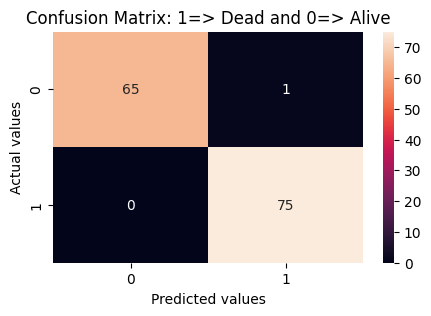

In [92]:
# Using seaborn and plt for better visualization
import seaborn as sns
plt.figure(figsize=(5,3))
sns.heatmap(c_matrix, annot=True)
plt.title('Confusion Matrix: 1=> Dead and 0=> Alive')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [93]:
# Percentage of correct prediction
# => (True_Positives + True_Negatives)/(Total_Predictions)
print("Accuracy Score:",metrics.accuracy_score(test_y,y_pred))

Accuracy Score: 0.9929078014184397


In [94]:
# Correct positive predictions relative to total positive predictions
# => (True_Positives)/(True_Positives + False_Positives)
# usually the "positive" is the less common classification (dead).
print("Precision Score:",metrics.precision_score(test_y,y_pred))

Precision Score: 0.9868421052631579


In [95]:
# Correct positive predictions relative to total true positive predictions
# => (True_Positives)/(True_Positives + False_Negatives)
# usually the "positive" is the less common classification (dead). 
print("Recall Score:",metrics.recall_score(test_y,y_pred))

Recall Score: 1.0


In [96]:
best_classifier = BaggingClassifier(base_estimator=ExtraTreesClassifier(), random_state=0)
start = time()
best_classifier.fit(train_X, train_y)
train_time = time() - start
start = time()
y_pred = best_classifier.predict(test_X)
predict_time = time()-start   
print(best_classifier)
print("\tTraining time: %0.3fs" % train_time)
print("\tPrediction time: %0.3fs" % predict_time)
print("\tExplained variance:", explained_variance_score(test_y, y_pred))
print("\tMean absolute error:", mean_absolute_error(test_y, y_pred))
print("\tAccuracy training score:", best_classifier.score(train_X, train_y))
print("\tAccuracy test score:", best_classifier.score(test_X, test_y))
print("\tRecall Score:",metrics.recall_score(test_y,y_pred))
print()

BaggingClassifier(base_estimator=ExtraTreesClassifier(), random_state=0)
	Training time: 2.545s
	Prediction time: 0.179s
	Explained variance: 1.0
	Mean absolute error: 0.0
	Accuracy training score: 1.0
	Accuracy test score: 1.0
	Recall Score: 1.0



In [97]:
from sklearn import metrics

c_matrix = metrics.confusion_matrix(test_y,y_pred)
c_matrix

array([[66,  0],
       [ 0, 75]], dtype=int64)

Text(33.22222222222222, 0.5, 'Actual values')

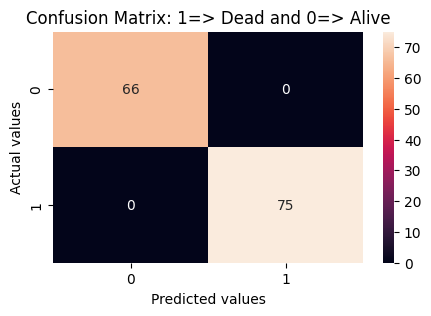

In [98]:
# Using seaborn and plt for better visualization
import seaborn as sns
plt.figure(figsize=(5,3))
sns.heatmap(c_matrix, annot=True)
plt.title('Confusion Matrix: 1=> Dead and 0=> Alive')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
# Percentage of correct prediction
# => (True_Positives + True_Negatives)/(Total_Predictions)
print("Accuracy Score:",metrics.accuracy_score(test_y,y_pred))

In [ ]:
# Correct positive predictions relative to total positive predictions
# => (True_Positives)/(True_Positives + False_Positives)
# usually the "positive" is the less common classification (dead).
print("Precision Score:",metrics.precision_score(test_y,y_pred))

In [ ]:
# Correct positive predictions relative to total true positive predictions
# => (True_Positives)/(True_Positives + False_Negatives)
# usually the "positive" is the less common classification (dead). 
print("Recall Score:",metrics.recall_score(test_y,y_pred))

In [ ]:
print("ROC_AUC Score:",metrics.roc_auc_score(test_y,y_pred))

In [ ]:
test_X

In [ ]:
#new_index = [i for i in range(len(test_X))]
test_X = test_X.reset_index(drop=True)
test_X
# index

In [ ]:
y_test_val = test_y.values
y_test_val = pd.Series(data=y_test_val, name='Actual Status')
y_test_val

In [ ]:
y_prediction = pd.Series(y_pred,name='Predicted Status')
y_prediction

In [ ]:
test_array_df = pd.concat((test_X, y_test_val, y_prediction),axis=1)
test_array_df.head(60)

In [ ]:
test_array_df.tail(60)

In [ ]:
# Exporting Results
test_array_df.to_excel('Initial_Fetal_Outcome_Results.xlsx')
print("The data output has been exported successfully")

## Classification Group Project

In [ ]:
#

In [ ]:
"""About Dataset
Context:
The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

Content:
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:


famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian - student's guardian (nominal: 'mother', 'father' or 'other')
traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
failures - number of past class failures (numeric: n if 1<=n<3, else 4)
schoolsup - extra educational support (binary: yes or no)
famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)
higher - wants to take higher education (binary: yes or no)
internet - Internet access at home (binary: yes or no)
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
freetime - free time after school (numeric: from 1 - very low to 5 - very high)
goout - going out with friends (numeric: from 1 - very low to 5 - very high)
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
health - current health status (numeric: from 1 - very bad to 5 - very good)
absences - number of school absences (numeric: from 0 to 93)
These grades are related with the course subject, Math or Portuguese:
"""
print()

### Based on Class tutorials, attempt using all the available classification algorithms to predict the student grades based on any of the features chosen. Hint: use feature importance code to select the useful features.

### Use the train_test_split to create the training and test datasets

In [ ]:
# Importing all the necessary modules to process our excel file
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import ExcelFile
from pandas import ExcelWriter
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# First task is to import the raw Excel file for processing purpose
filename = 'Student_Performance_Analysis.xlsx'

student_df = pd.read_excel(filename,sheet_name=0,skiprows=0,nrows=373)
student_df

In [ ]:
# Identifiying columns with Nan Values
for cols in student_df.columns:
    print(f'\t{cols:<28}: {student_df[cols].isna().sum()} NaN Values')

In [ ]:
# df = pd.DataFrame({'Actual': y_test.flatten(), 'yearly_lrm': y_year_lrm.flatten()})
student_df.columns

In [ ]:
# The Independent variables

X_val = student_df.drop(columns=['Grade'])
X_val

In [ ]:
y_val = student_df['Grade']
y_val

In [ ]:
y_val.value_counts()

In [ ]:
#Random Forest Prediction
X_train, X_test, y_train, y_test = train_test_split(X_val, Y_val, test_size=0.25)
rf1_score = cross_val_score(RandomForestClassifier(), 
                            X_train, y_train,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)
#model.fit(X_train, y_train)
#score = model.score(X_test, y_test)

print('Done. Score:', (np.round(rf1_score,decimals=4)*100))

In [ ]:
#Getting the Best Random Forest Classifier
param_grid = {
    'n_estimators': [5,10,15,20],
    'max_depth': [6,8,10]
}
gridsearch = GridSearchCV(RandomForestClassifier(n_jobs = -1), 
                          param_grid=param_grid, 
                          scoring='accuracy', cv=3, 
                          return_train_score=True, verbose=5)
gridsearch.fit(X_train, y_train)
pd.DataFrame(gridsearch.cv_results_).sort_values( \
                                         by='rank_test_score')

In [ ]:
#Implementing the best method
X_train, X_test, y_train, y_test = train_test_split(X_val, Y_val, test_size=0.40)
best_cv_score = 0
no_iter = 0
while np.round(best_cv_score,decimals=4)*100 < 90:
    #X_train, X_test, y_train, y_test = train_test_split(X_val, Y_val, test_size=0.30,random_state=5)
    rf_clf = RandomForestClassifier(max_depth =6, 
                             n_estimators = 15, 
                             n_jobs = -1)
    rf_clf.fit(X_train, y_train)
    y_test_pred = rf_clf.predict(X_test)
    best_cv_score = rf_clf.score(X_test, y_test)
    no_iter+=1
print('Done. Score:', (np.round(best_cv_score,decimals=4)*100))
print('No of Iteration:',no_iter)

In [ ]:
test_df = pd.DataFrame(X_test)
if ('y_test_pred' in test_df):
    test_df.drop('y_test_pred',axis='columns', inplace=True)
test_df.insert(7,'y_test_pred',y_test_pred)
test_df.head(77)

In [ ]:
#Using Support Vector Machine Classifier

svm_clf = SVC()
svm_score = 0
no_iter = 0
while np.round(svm_score,decimals=4)*100 < 70:
    svm_clf.fit(X_train, y_train)
    y_test_pred1 = svm_clf.predict(X_test)
    svm_score = svm_clf.score(X_test, y_test)
    no_iter+=1
print('Done. Score:', (np.round(svm_score,decimals=4)*100))
print('No of Iteration:',no_iter)

In [ ]:
#Using Logistic Regression Classifier

lgr_clf = LogisticRegression()
lgr_score = 0
no_iter = 0
while np.round(lgr_score,decimals=4)*100 < 70:
    lgr_clf.fit(X_train, y_train)
    y_test_pred1 = lgr_clf.predict(X_test)
    lgr_score = lgr_clf.score(X_test, y_test)
    no_iter+=1
print('Done. Score:', (np.round(lgr_score,decimals=4)*100))
print('No of Iteration:',no_iter)

In [ ]:
#Do not Run
#Using Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
naive_clf = GaussianNB()
naive_score = 0
no_iter = 0
while np.round(naive_score,decimals=4)*100 < 50:
    naive_clf.fit(X_train, y_train)
    y_test_pred1 = naive_clf.predict(X_test)
    naive_score = naive_clf.score(X_test, y_test)
    no_iter+=1
print('Done. Score:', (np.round(naive_score,decimals=4)*100))
print('No of Iteration:',no_iter)

In [ ]:
test_df = pd.DataFrame(X_test)
if ('y_test_pred' in test_df):
    test_df.drop('y_test_pred',axis='columns', inplace=True)
test_df.insert(7,'y_test_pred',y_test_pred)
test_df.head(77)

In [ ]:
predict_input = initial_df.iloc[30:41,0:7]
objList = predict_input.select_dtypes(include = "object").columns
print (objList)


In [ ]:
predict_input

In [ ]:
le = LabelEncoder()
for feat in objList:
    predict_input[feat] = le.fit_transform(predict_input[feat].astype(str))

In [ ]:
predict_input

In [ ]:
y_predict = rf_clf.predict(predict_input)
y_predict

In [ ]:
#Confirming the prediction of S_No 31 to 41
# O mean No, and 1 mean Yest

predict_df = pd.DataFrame(predict_input)
if ('y_Predict' in predict_df):
    test_df.drop('y_predict',axis='columns', inplace=True)
predict_df.insert(7,'y_predict',y_predict)
predict_df.head(77)

In [ ]:
#Getting the Best ExtraTrees Classifier
param_grid = {
    'n_estimators': [5,10,15,20],
    'max_depth': [6,8,10]
}
gridsearch2 = GridSearchCV(ExtraTreesClassifier(n_jobs = -1), 
                          param_grid=param_grid, 
                          scoring='recall', cv=3, 
                          return_train_score=True, verbose=5)
gridsearch2.fit(train_X, train_y)
pd.DataFrame(gridsearch2.cv_results_).sort_values( \
                                         by='rank_test_score')

In [ ]:
#Getting the Best Random Forest Classifier
param_grid = {
    'n_estimators': [5,10,15,20],
    'max_depth': [6,8,10]
}
gridsearch1 = GridSearchCV(RandomForestClassifier(n_jobs = -1), 
                          param_grid=param_grid, 
                          scoring='recall', cv=3, 
                          return_train_score=True, verbose=5)
gridsearch1.fit(train_X, train_y)
pd.DataFrame(gridsearch1.cv_results_).sort_values( \
                                         by='rank_test_score')